In [ ]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
df = pd.read_csv('/content/tel_churn.csv')

In [ ]:
df.head()

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,0,29.85,29.85,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
1,1,0,56.95,1889.50,0,0,1,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,2,0,53.85,108.15,1,0,1,1,0,1,...,0,0,0,1,1,0,0,0,0,0
3,3,0,42.30,1840.75,0,0,1,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,4,0,70.70,151.65,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0


In [ ]:
df.describe()

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.00000,7032.000000,7032.000000,7032.000000,7032.000000
mean,3521.562144,0.162400,64.798208,2283.300441,0.265785,0.495307,0.504693,0.517491,0.482509,0.701507,...,0.219283,0.216297,0.336320,0.228100,0.309300,0.14562,0.118316,0.108362,0.118316,0.200085
std,2032.832448,0.368844,30.085974,2266.771362,0.441782,0.500014,0.500014,0.499729,0.499729,0.457629,...,0.413790,0.411748,0.472483,0.419637,0.462238,0.35275,0.323005,0.310859,0.323005,0.400092
min,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,1762.750000,0.000000,35.587500,401.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,3521.500000,0.000000,70.350000,1397.475000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,5282.250000,0.000000,89.862500,3794.737500,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,7042.000000,1.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df=df.drop('Unnamed: 0',axis=1)

Spiltting the dataset into X and y datasets

In [ ]:
X=df.drop('Churn',axis=1)
X.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,1,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,1,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,0,1,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0


In [ ]:
y=df['Churn']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_regression_model = LogisticRegression(random_state=42)
logistic_regression_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [ ]:
y_pred_logistic_regression = logistic_regression_model.predict(X_test)

In [ ]:
accuracy_logistic_regression = accuracy_score(y_test, y_pred_logistic_regression)
cm_logistic_regression = confusion_matrix(y_test, y_pred_logistic_regression)
report_logistic_regression = classification_report(y_test, y_pred_logistic_regression)
print(f"Accuracy: {accuracy_logistic_regression}")
print(f"Confusion Matrix:\n{cm_logistic_regression}")
print(f"Classification Report:\n{report_logistic_regression}")

Accuracy: 0.8048919226393629
Confusion Matrix:
[[1175  132]
 [ 211  240]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1307
           1       0.65      0.53      0.58       451

    accuracy                           0.80      1758
   macro avg       0.75      0.72      0.73      1758
weighted avg       0.80      0.80      0.80      1758



In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier(criterion = "gini",random_state = 42)
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred_decision_tree = decision_tree_model.predict(X_test)

In [ ]:
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
cm_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)
report_decision_tree = classification_report(y_test, y_pred_decision_tree)
print(f"Accuracy: {accuracy_decision_tree}")
print(f"Confusion Matrix:\n{cm_decision_tree}")
print(f"Classification Report:\n{report_decision_tree}")

Accuracy: 0.7445961319681457
Confusion Matrix:
[[1072  235]
 [ 214  237]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.82      0.83      1307
           1       0.50      0.53      0.51       451

    accuracy                           0.74      1758
   macro avg       0.67      0.67      0.67      1758
weighted avg       0.75      0.74      0.75      1758



In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 42)
random_forest_model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_random_forest = random_forest_model.predict(X_test)

In [ ]:
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
cm_random_forest = confusion_matrix(y_test, y_pred_random_forest)
report_random_forest = classification_report(y_test, y_pred_random_forest)
print(f"Accuracy: {accuracy_random_forest}")
print(f"Confusion Matrix:\n{cm_random_forest}")
print(f"Classification Report:\n{report_random_forest}")

Accuracy: 0.7946530147895335
Confusion Matrix:
[[1164  143]
 [ 218  233]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1307
           1       0.62      0.52      0.56       451

    accuracy                           0.79      1758
   macro avg       0.73      0.70      0.71      1758
weighted avg       0.79      0.79      0.79      1758



In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
selected_features = ['MonthlyCharges','TotalCharges']
scaler.fit(X_train[selected_features])
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[selected_features] = scaler.transform(X_train[selected_features])
X_test_scaled[selected_features] = scaler.transform(X_test[selected_features])

In [ ]:
from sklearn.naive_bayes import GaussianNB
gaussian_nb_model = GaussianNB()
gaussian_nb_model.fit(X_train_scaled,y_train)

GaussianNB()

In [ ]:
y_pred_gaussian_nb = gaussian_nb_model.predict(X_test_scaled)

In [ ]:
accuracy_gaussian_nb = accuracy_score(y_test, y_pred_gaussian_nb)
cm_gaussian_nb = confusion_matrix(y_test, y_pred_gaussian_nb)
report_gaussian_nb = classification_report(y_test, y_pred_gaussian_nb)
print(f"Accuracy: {accuracy_gaussian_nb}")
print(f"Confusion Matrix:\n{cm_gaussian_nb}")
print(f"Classification Report:\n{report_gaussian_nb}")

Accuracy: 0.7030716723549488
Confusion Matrix:
[[850 457]
 [ 65 386]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.65      0.77      1307
           1       0.46      0.86      0.60       451

    accuracy                           0.70      1758
   macro avg       0.69      0.75      0.68      1758
weighted avg       0.81      0.70      0.72      1758



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
k = 5
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred_knn = knn_model.predict(X_test)

In [ ]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
cm_knn = confusion_matrix(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)
print(f"Accuracy: {accuracy_knn}")
print(f"Confusion Matrix:\n{cm_knn}")
print(f"Classification Report:\n{report_knn}")

Accuracy: 0.7639362912400455
Confusion Matrix:
[[1141  166]
 [ 249  202]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.87      0.85      1307
           1       0.55      0.45      0.49       451

    accuracy                           0.76      1758
   macro avg       0.68      0.66      0.67      1758
weighted avg       0.75      0.76      0.76      1758



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
base_estimator = DecisionTreeClassifier(max_depth=5)
n_estimators = 100
adaboost_model = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=n_estimators)
adaboost_model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                   n_estimators=100)

In [ ]:
y_pred_adaboost = adaboost_model.predict(X_test)

In [ ]:
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
cm_adaboost = confusion_matrix(y_test, y_pred_adaboost)
report_adaboost = classification_report(y_test, y_pred_adaboost)
print(f"Accuracy: {accuracy_adaboost}")
print(f"Confusion Matrix:\n{cm_adaboost}")
print(f"Classification Report:\n{report_adaboost}")

Accuracy: 0.7639362912400455
Confusion Matrix:
[[1101  206]
 [ 209  242]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1307
           1       0.54      0.54      0.54       451

    accuracy                           0.76      1758
   macro avg       0.69      0.69      0.69      1758
weighted avg       0.76      0.76      0.76      1758



In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred_xbg = xgb_model.predict(X_test)

In [ ]:
accuracy_xbg = accuracy_score(y_test, y_pred_xbg)
cm_xbg = confusion_matrix(y_test, y_pred_xbg)
report_xbg = classification_report(y_test, y_pred_xbg)
print(f"Accuracy: {accuracy_xbg}")
print(f"Confusion Matrix:\n{cm_xbg}")
print(f"Classification Report:\n{report_xbg}")

Accuracy: 0.7912400455062572
Confusion Matrix:
[[1145  162]
 [ 205  246]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1307
           1       0.60      0.55      0.57       451

    accuracy                           0.79      1758
   macro avg       0.73      0.71      0.72      1758
weighted avg       0.79      0.79      0.79      1758



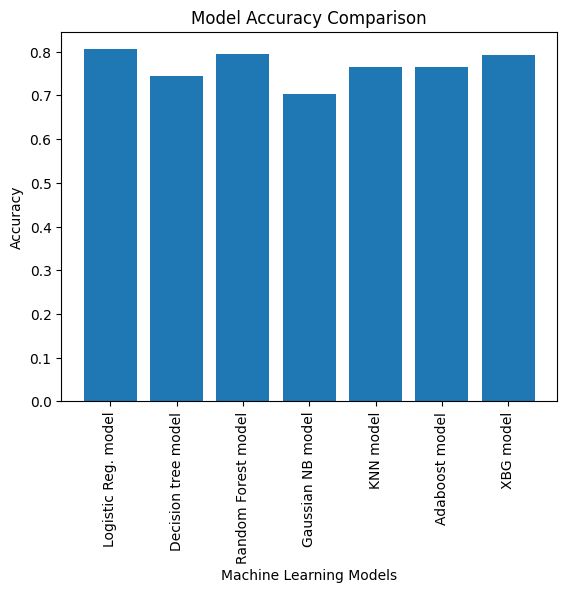

In [ ]:
import matplotlib.pyplot as plt
models = ['Logistic Reg. model', 'Decision tree model', 'Random Forest model', 'Gaussian NB model', 'KNN model', 'Adaboost model', 'XBG model']
accuracy = [accuracy_logistic_regression, accuracy_decision_tree, accuracy_random_forest, accuracy_gaussian_nb, accuracy_knn, accuracy_adaboost, accuracy_xbg]
plt.bar(models, accuracy)
plt.xlabel('Machine Learning Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=90)
plt.show()
